In [1]:
%matplotlib inline
from pymc3 import  *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

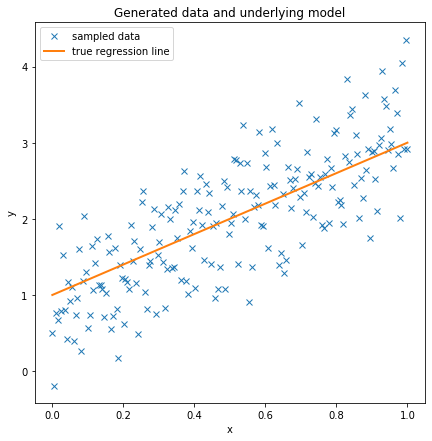

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [6]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2, tune=1000) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 8000/8000 [00:11<00:00, 680.02draws/s]


In [9]:
import statsmodels.api as sm
mu, sigma = 2, 0.9
X1 = np.random.normal(mu, sigma, size=100)
X2 = np.random.normal(loc=X1, scale=0.05)
Y = np.random.normal(loc=X1+X2, scale=1)
X = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], 1)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     156.8
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           4.07e-31
Time:                        09:00:57   Log-Likelihood:                -139.06
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0929      0.253     -0.367      0.7

In [16]:
basic_model = Model()
with basic_model:
    # Priors for unknown model parameters
    #sigma = InverseGamma('sigma', alpha=1, beta=1)
    #alpha = Normal('alpha', mu=0, sigma=sigma)
    #lamb=0.01
    #sigma2 = sigma/lamb
    beta = Normal('beta', mu=1, sigma=2, shape=2)
    sigma = HalfNormal('sigma', sigma=1)
    #sigma = Gamma('sigma', alpha=1, beta=1)
    

    # Expected value of outcome: lineal model.
    mu = beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    # instantiate sampler
    #step = pm.Slice()
    # draw 5000 posterior samples
    step = NUTS()
    trace = sample(5000, tune=1000, cores=2, step=step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:52<00:00, 230.75draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe405be3110>,
      dtype=object)

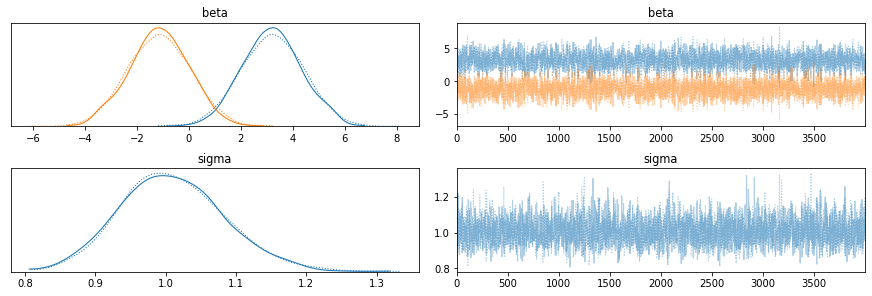

In [17]:
traceplot(trace[1000:])

In [50]:
X = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)

In [51]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [52]:
reg.coef_

array([-0.28234077,  5.12587155])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

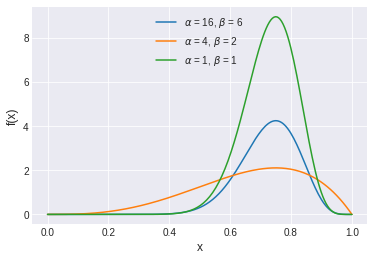

In [9]:
plt.style.use('seaborn-darkgrid')
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 1., 2., 2.]
betas = [.5, 1., 3., 2., 5.]
#for a, b in zip(alphas, betas):
prior = st.beta.pdf(x, 16, 6)
plt.plot(x, prior, label=r'$\alpha$ = {}, $\beta$ = {}'.format(16, 6))

likelihood = st.beta.pdf(x, 4, 2)
plt.plot(x, likelihood, label=r'$\alpha$ = {}, $\beta$ = {}'.format(4, 2))

posterior = likelihood*prior
plt.plot(x, posterior, label=r'$\alpha$ = {}, $\beta$ = {}'.format(1, 1))
    
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
#plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

https://www.thomasjpfan.com/2015/09/bayesian-coin-flips/

https://people.duke.edu/~ccc14/sta-663/PyMC3.html

https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_BayesianRegression.ipynb

https://brunaw.com/phd/bayes-regression/report.pdf